In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#import statsmodel.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [36]:
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [37]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [38]:
df.shape

(1470, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [7]:
df.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [39]:
df['BusinessTravel']=df['BusinessTravel'].replace({'Travel_Rarely':1,'Travel_Frequently':2,'Non-Travel':3})
df['Department']=df['Department'].replace({'Research & Development':1,'Sales':2,'Human Resources':3})
df['EducationField']=df['EducationField'].replace({'Life Sciences':1,'Medical':2,'Marketing':3,'Technical Degree':4
                                                  ,'Other':5,'Human Resources':6})
df['Attrition']=df['Attrition'].replace({'No':0,'Yes':1})
df['Gender']=df['Gender'].replace({'Male':0,'Female':1})
df['JobRole']=df['JobRole'].replace({'Sales Executive':1,'Research Scientist':2,'Laboratory Technician':3,
                                     'Manufacturing Director':4,'Healthcare Representative':5,'Manager':6,
                                     'Sales Representative':7,'Research Director':8,'Human Resources':9})
df['MaritalStatus']=df['MaritalStatus'].replace({'Married':1,'Single':2,'Divorced':3})
df['MaritalStatus']=df['MaritalStatus'].replace({'Married':1,'Single':2,'Divorced':3})
df['OverTime']=df['OverTime'].replace({'Yes':1,'No':0})
df['Over18']=df['Over18'].replace({'Y':1})

In [9]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,1,2,2,5,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,1,2,1,2,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,2,884,1,23,2,2,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,1,613,1,6,1,2,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,1,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,2,1023,2,2,3,2,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int64
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

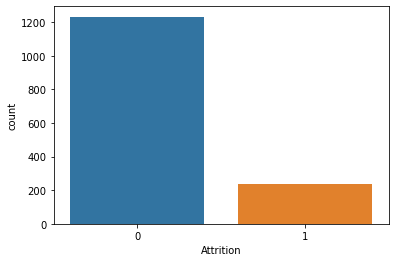

In [11]:
sns.countplot(x='Attrition',data=df)
plt.show()

Age
Attrition
BusinessTravel
DailyRate
Department
DistanceFromHome
Education
EducationField
EmployeeCount
EmployeeNumber
EnvironmentSatisfaction
Gender
HourlyRate
JobInvolvement
JobLevel
JobRole
JobSatisfaction
MaritalStatus
MonthlyIncome
MonthlyRate
NumCompaniesWorked
Over18
OverTime
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StandardHours
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


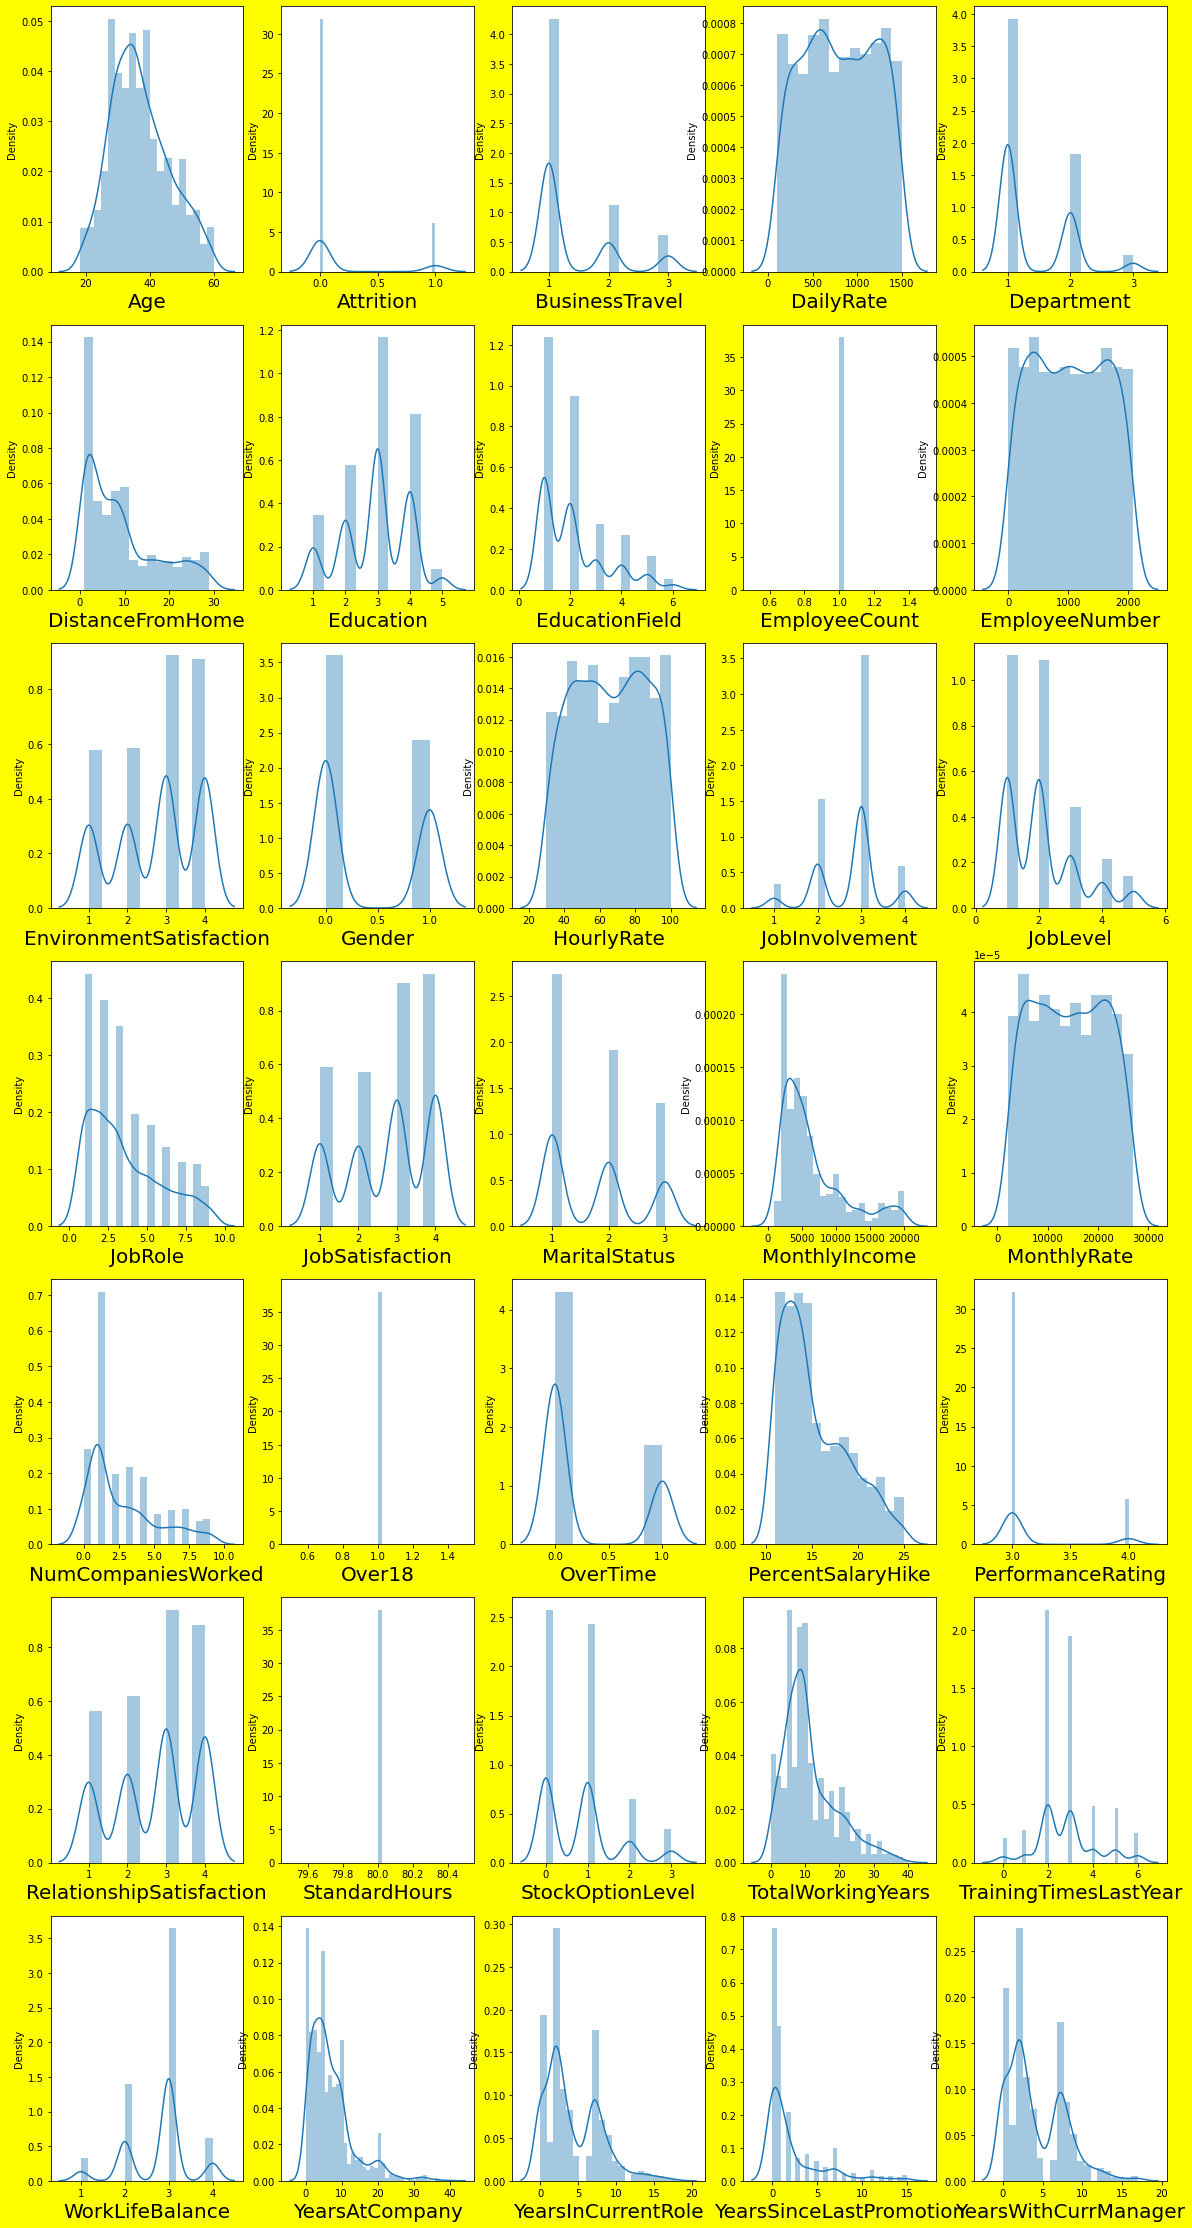

In [41]:
plt.figure(figsize=(20,40), facecolor='yellow')
plotnumber=1

for column in df:
    if plotnumber<=35:
        ax=plt.subplot(7,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        print(column)
    plotnumber+=1
plt.show()

In [42]:
y = df['Attrition']
X = df.drop(columns = ['Attrition'])

In [43]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,2,1,2,1,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,2,279,1,8,1,1,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1373,1,2,2,5,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,2,1392,1,3,4,1,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,1,591,1,2,1,2,1,7,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,2,884,1,23,2,2,1,2061,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,1,613,1,6,1,2,1,2062,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,1,155,1,4,3,1,1,2064,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,2,1023,2,2,3,2,1,2065,4,...,4,80,0,17,3,2,9,6,0,8


In [44]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

Age
BusinessTravel
DailyRate
Department
DistanceFromHome
Education
EducationField
EmployeeCount
EmployeeNumber
EnvironmentSatisfaction
Gender
HourlyRate
JobInvolvement
JobLevel
JobRole
JobSatisfaction
MaritalStatus
MonthlyIncome
MonthlyRate
NumCompaniesWorked
Over18
OverTime
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StandardHours
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


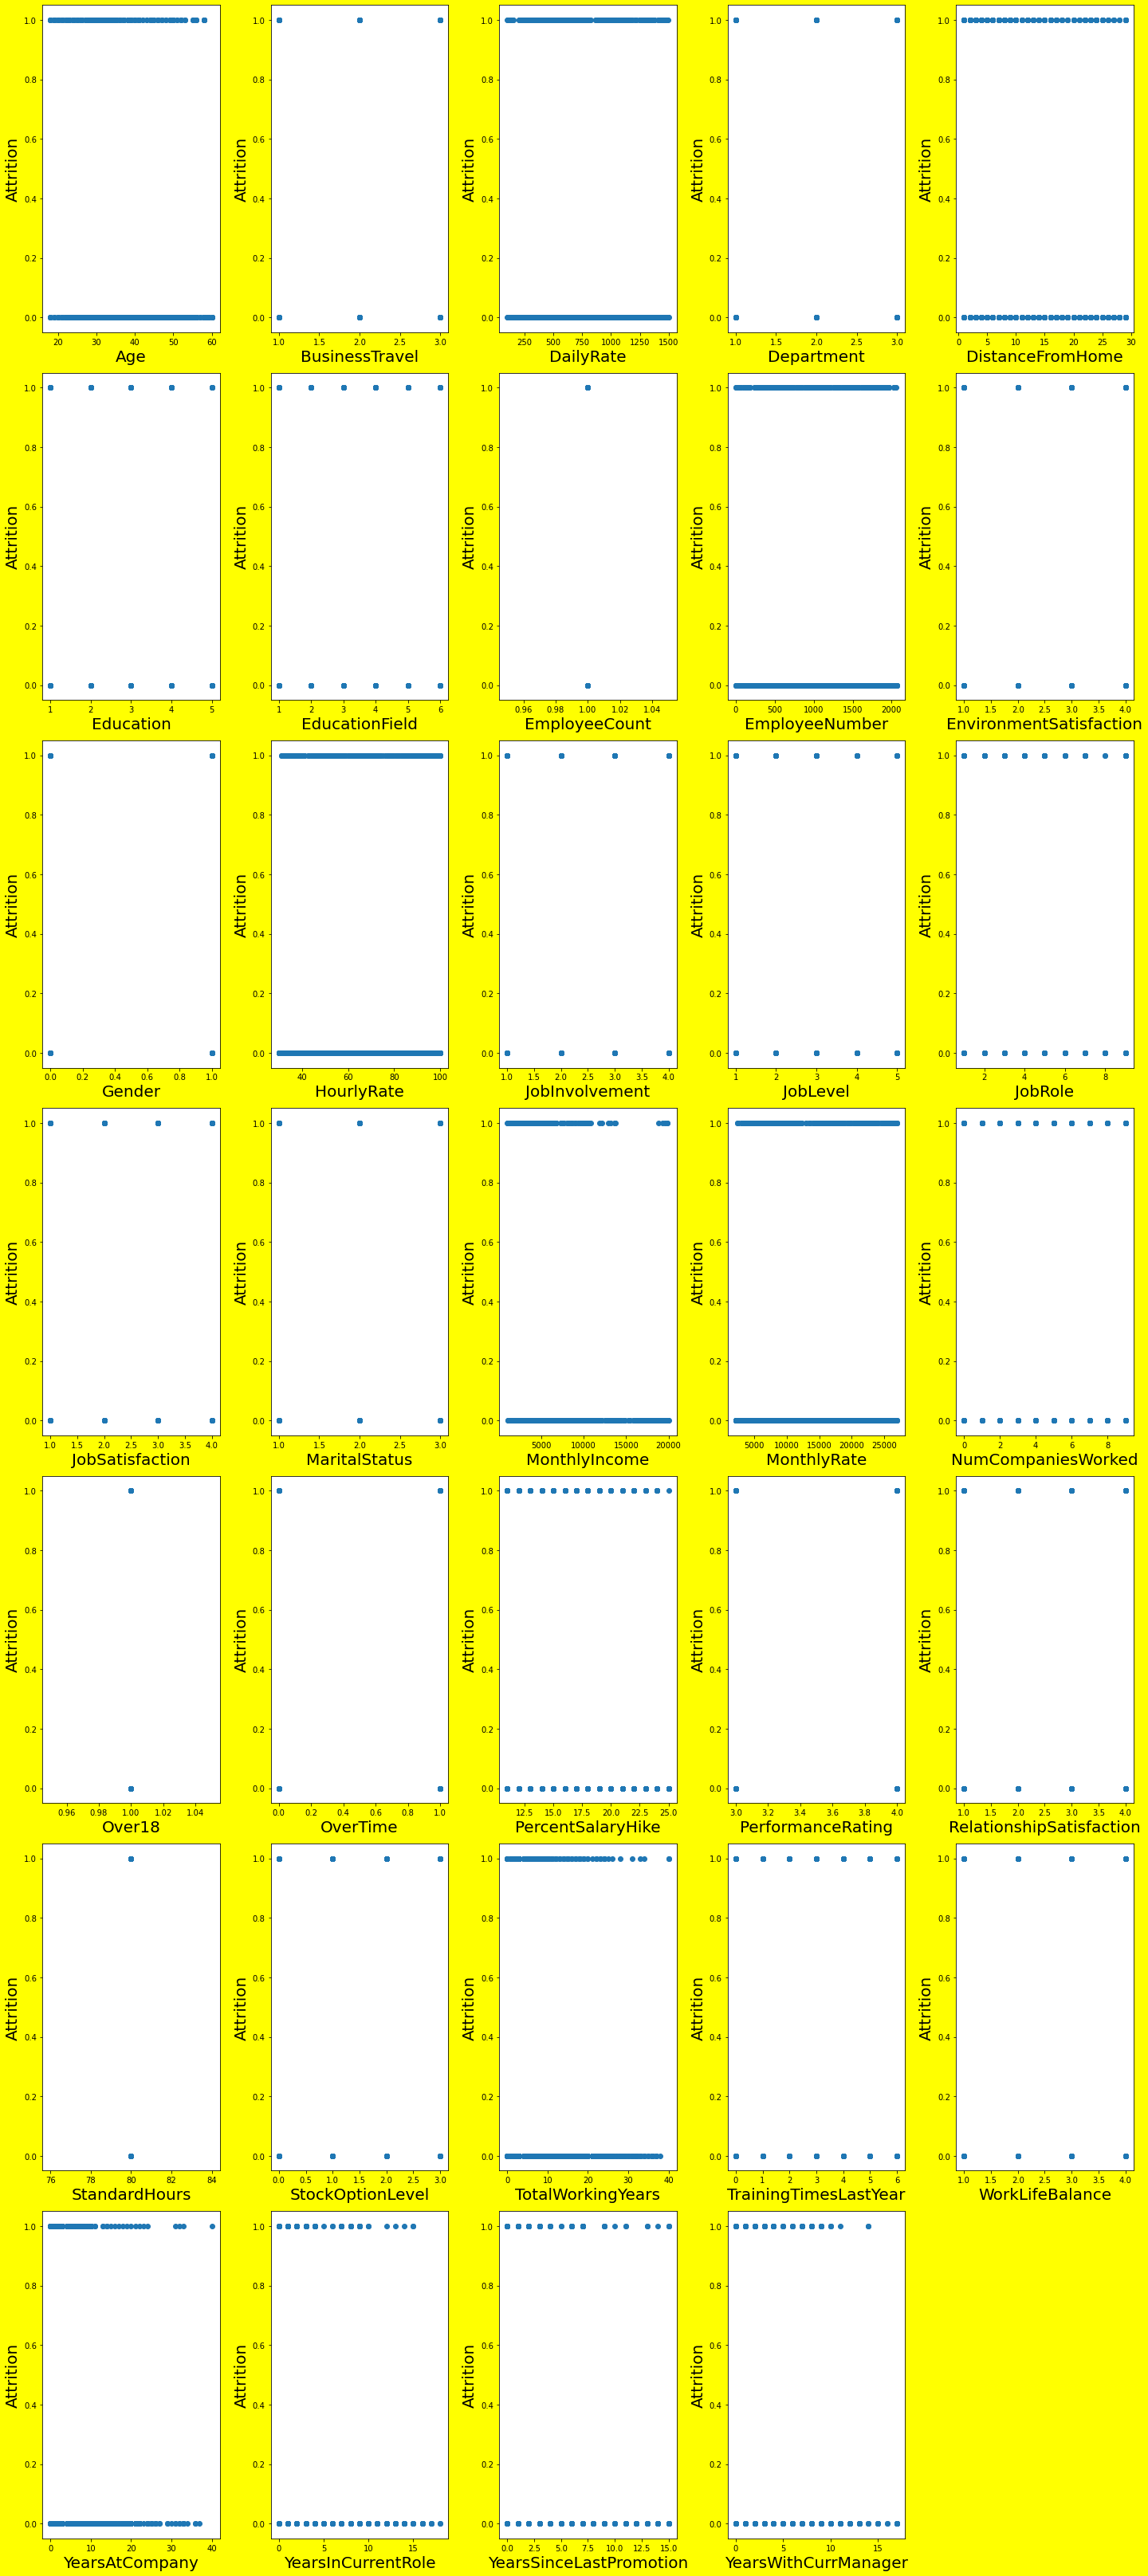

In [45]:
#Lets visualize the dataset and analyze the data
plt.figure(figsize=(20,45), facecolor='yellow')
plotnumber = 1

for column in X:
    if plotnumber<=35:
        ax=plt.subplot(7,5,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Attrition',fontsize=20)
        print(column)
    plotnumber+=1
plt.tight_layout()

In [46]:
from sklearn.feature_selection import SelectKBest, f_classif

In [47]:
best_features=SelectKBest(score_func=f_classif, k=17)
fit=best_features.fit(X,y)

df_scores=pd.DataFrame(fit.scores_)#as we kknow this will be done through ANOVA , taht score I am going to get

df_columns=pd.DataFrame(X.columns)

feature_scores=pd.concat([df_columns,df_scores],axis=1)

feature_scores.columns=['Features_Name','Score']#name output columns

print(feature_scores.nlargest(17,'Score'))

              Features_Name      Score
21                 OverTime  94.656457
27        TotalWorkingYears  44.252491
13                 JobLevel  43.215344
31       YearsInCurrentRole  38.838303
17            MonthlyIncome  38.488819
0                       Age  38.175887
33     YearsWithCurrManager  36.712311
26         StockOptionLevel  28.140501
30           YearsAtCompany  27.001624
12           JobInvolvement  25.241985
15          JobSatisfaction  15.890004
9   EnvironmentSatisfaction  15.855209
4          DistanceFromHome   8.968277
3                Department   8.836173
29          WorkLifeBalance   6.026116
6            EducationField   5.723625
28    TrainingTimesLastYear   5.211646


In [34]:
new_X=df[['OverTime','TotalWorkingYears','JobLevel','YearsInCurrentRole','MonthlyIncome','Age','YearsWithCurrManager','StockOptionLevel','YearsAtCompany','JobInvolvement','JobSatisfaction','EnvironmentSatisfaction','DistanceFromHome','Department','WorkLifeBalance','EducationField','TrainingTimesLastYear']]

In [48]:
new_X

,OverTime,TotalWorkingYears,JobLevel,YearsInCurrentRole,MonthlyIncome,Age,YearsWithCurrManager,StockOptionLevel,YearsAtCompany,JobInvolvement,JobSatisfaction,EnvironmentSatisfaction,DistanceFromHome,Department,WorkLifeBalance,EducationField,TrainingTimesLastYear
0,1,8,2,4,5993,41,5,0,6,3,4,2,1,2,1,1,0
1,0,10,2,7,5130,49,7,1,10,2,2,3,8,1,3,1,3
2,1,7,1,0,2090,37,0,0,0,2,3,4,2,1,3,5,3
3,1,8,1,7,2909,33,0,0,8,3,3,4,3,1,3,1,3
4,0,6,1,2,3468,27,2,1,2,3,2,1,2,1,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,17,2,2,2571,36,3,1,5,4,4,3,23,1,3,2,3
1466,0,9,3,7,9991,39,7,1,7,2,1,4,6,1,3,2,5
1467,1,6,2,2,6142,27,3,1,6,4,2,2,4,1,3,1,0
1468,0,17,2,6,5390,49,8,0,9,2,2,4,2,2,2,2,3


In [49]:
scalar=StandardScaler()
X_scalar=scalar.fit_transform(new_X)

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier

In [52]:
from time import time

x_train,x_test,y_train,y_test=train_test_split(X_scalar,y,test_size=0.25, random_state=355)

knn=KNeighborsClassifier()

start=time()
knn.fit(x_train,y_train)
print("Knn Training time",(time()-start))

start=time()
y_pred=knn.predict(x_test)
print("Knn Test time",(time()-start))

Knn Training time 0.0
Knn Test time 0.03714799880981445


In [53]:
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[299,   8],
       [ 51,  10]], dtype=int64)

In [54]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       307
           1       0.56      0.16      0.25        61

    accuracy                           0.84       368
   macro avg       0.70      0.57      0.58       368
weighted avg       0.80      0.84      0.80       368



In [ ]:
Cross Validation

In [55]:
from sklearn.model_selection import KFold,cross_val_score

k_f=KFold(n_splits=3,shuffle=True)

k_f

KFold(n_splits=3, random_state=None, shuffle=True)

In [56]:
for train,test in k_f.split([1,2,3,4,5,6,7,8,9,10]):
    print('train',train,'test',test)

train [2 3 4 5 6 7] test [0 1 8 9]
train [0 1 3 5 7 8 9] test [2 4 6]
train [0 1 2 4 6 8 9] test [3 5 7]


In [57]:
cross_val_score(knn,X_scalar,y,cv=10)

array([0.83673469, 0.85714286, 0.83673469, 0.85714286, 0.85714286,
       0.84353741, 0.82993197, 0.86394558, 0.84353741, 0.85034014])

In [58]:
cross_val_score(KNeighborsClassifier(),X_scalar,y,cv=5).mean()

0.8510204081632654

In [ ]:
Trial 2

In [59]:
best_features=SelectKBest(score_func=f_classif, k=17)
fit=best_features.fit(X,y)

df_scores=pd.DataFrame(fit.scores_)#as we kknow this will be done through ANOVA , taht score I am going to get

df_columns=pd.DataFrame(X.columns)

feature_scores=pd.concat([df_columns,df_scores],axis=1)

feature_scores.columns=['Features_Name','Score']#name output columns

print(feature_scores.nlargest(10,'Score'))

           Features_Name      Score
21              OverTime  94.656457
27     TotalWorkingYears  44.252491
13              JobLevel  43.215344
31    YearsInCurrentRole  38.838303
17         MonthlyIncome  38.488819
0                    Age  38.175887
33  YearsWithCurrManager  36.712311
26      StockOptionLevel  28.140501
30        YearsAtCompany  27.001624
12        JobInvolvement  25.241985


In [60]:
new_X1=df[['OverTime','TotalWorkingYears','JobLevel','YearsInCurrentRole','MonthlyIncome','Age','YearsWithCurrManager','StockOptionLevel','YearsAtCompany','JobInvolvement']]

In [61]:
scalar=StandardScaler()
X_scalar=scalar.fit_transform(new_X1)

In [62]:
from time import time

x_train,x_test,y_train,y_test=train_test_split(X_scalar,y,test_size=0.25, random_state=355)

knn=KNeighborsClassifier()

start=time()
knn.fit(x_train,y_train)
print("Knn Training time",(time()-start))

start=time()
y_pred=knn.predict(x_test)
print("Knn Test time",(time()-start))

Knn Training time 0.004000425338745117
Knn Test time 0.011002779006958008


In [63]:
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[294,  13],
       [ 50,  11]], dtype=int64)

In [64]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       307
           1       0.46      0.18      0.26        61

    accuracy                           0.83       368
   macro avg       0.66      0.57      0.58       368
weighted avg       0.79      0.83      0.80       368



# We can see from the above 2 trials report with 84% accuracy